# Fashion Image Recognition using Deep Convolutional Neural Networks:

Using images of fashion we try to predict what type of clothing it is.

Import libraries and tools

In [ ]:
import tensorflow as tf
from tensorflow import keras

# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
#from tensorflow.keras.utils import np_utils

import numpy as np

#from tensorflow.keras import layers

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Fix random seed for reproducibility

In [ ]:
np.random.seed(0)

Downloading and splitting the dataset

In [ ]:
# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist

# By default, the first 60k of MNIST has been defined as training and the rest as testing set:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Viewing samples from the dataset

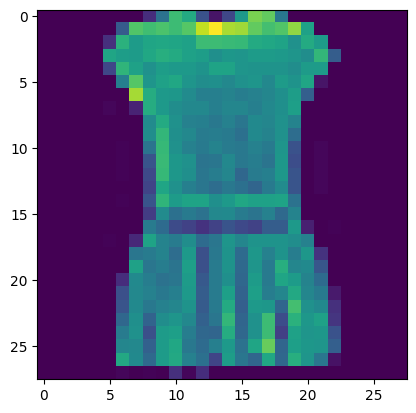

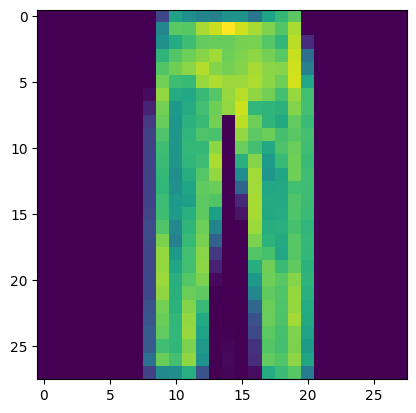

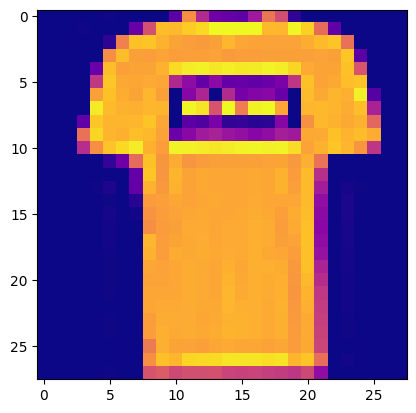

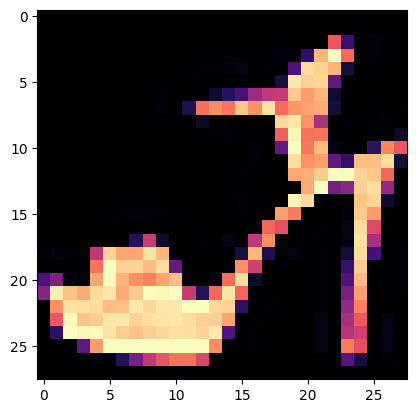

In [ ]:
%matplotlib inline

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()

Data preprocessing

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [ ]:
# Perform one-hot encoding for the output labels using NumPy
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [ ]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Define the Network Architecture (model):

In [ ]:
# Declare Sequential model from our network:
model = Sequential()

In [ ]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), padding="same"))
print(model.output_shape) # with no zero padding -> (None, 26, 26, 32)

# If your image batch is of N images of HxW size with C channels:
# theano uses the NCHW ordering while tensorflow uses the NHWC ordering.

(None, 28, 28, 32)


In [ ]:
# more hidden layers:
model.add(Convolution2D(64, (3, 3), activation='relu', padding="same"))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25))

# Convultion Layer and Relu layer:
model.add(Convolution2D(32, (3, 3), activation='relu', padding="same"))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25))


(None, 28, 28, 64)
(None, 14, 14, 64)
(None, 14, 14, 32)
(None, 7, 7, 32)


In [ ]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 1568)
(None, 128)
(None, 10)


Compile

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')
# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                   

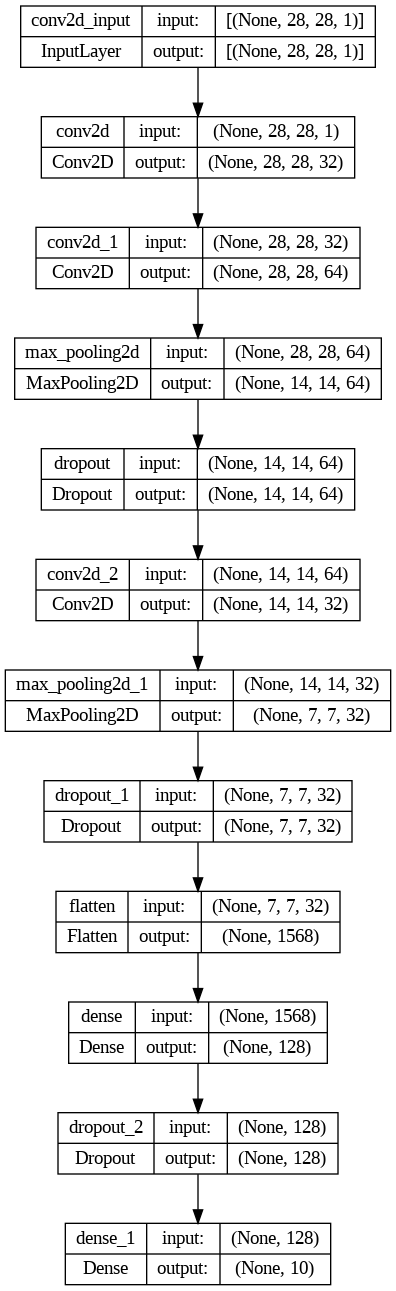

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Training the model

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=64, epochs=28, verbose=1)

# batch_size: Integer or None. Number of samples per gradient update.
# epochs: Number of iteration over the entire training data.
# verbose: 0, 1, or 2. how want to see the training progress. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data.
# You can add some callbacks to get a view on internal states and statistics of the model during training:
# https://keras.io/callbacks/

Epoch 1/28
704/704 [==============================] - 20s 10ms/step - loss: 0.6262 - accuracy: 0.7735 - val_loss: 0.3623 - val_accuracy: 0.8677
Epoch 2/28
704/704 [==============================] - 6s 9ms/step - loss: 0.3976 - accuracy: 0.8559 - val_loss: 0.2901 - val_accuracy: 0.8925
Epoch 3/28
704/704 [==============================] - 6s 8ms/step - loss: 0.3376 - accuracy: 0.8777 - val_loss: 0.2644 - val_accuracy: 0.9009
Epoch 4/28
704/704 [==============================] - 6s 9ms/step - loss: 0.3071 - accuracy: 0.8883 - val_loss: 0.2453 - val_accuracy: 0.9073
Epoch 5/28
704/704 [==============================] - 6s 8ms/step - loss: 0.2845 - accuracy: 0.8978 - val_loss: 0.2409 - val_accuracy: 0.9121
Epoch 6/28
704/704 [==============================] - 6s 9ms/step - loss: 0.2686 - accuracy: 0.9030 - val_loss: 0.2280 - val_accuracy: 0.9165
Epoch 7/28
704/704 [==============================] - 8s 11ms/step - loss: 0.2584 - accuracy: 0.9046 - val_loss: 0.2174 - val_accuracy: 0.9217
Epo

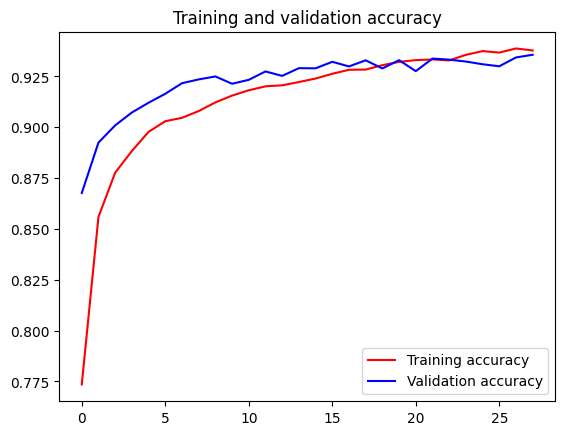

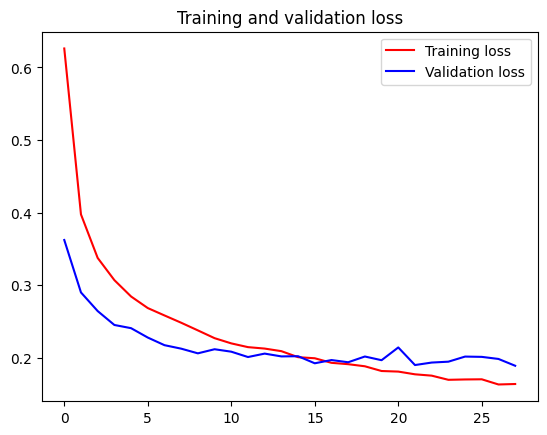

In [ ]:
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2117 - accuracy: 0.9287
The accuracy is:  0.9286999702453613


Saving the model

In [ ]:
model.save('fashion_model')

zipping the model

In [ ]:
!zip -r /content/fashion_model.zip /content/fashion_model

  adding: content/fashion_model/ (stored 0%)
  adding: content/fashion_model/variables/ (stored 0%)
  adding: content/fashion_model/variables/variables.index (deflated 63%)
  adding: content/fashion_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/fashion_model/keras_metadata.pb (deflated 91%)
  adding: content/fashion_model/assets/ (stored 0%)
  adding: content/fashion_model/fingerprint.pb (stored 0%)
  adding: content/fashion_model/saved_model.pb (deflated 87%)
